# Time Series analysis code: metal price data from investing.com

This work consists of a time series analysis of the price of metals: particularly palladium over the last 4 years and a tentative to use predictive model to forecast. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')


1- importing the gold and palladium datasets as dataframes

In [2]:
data_gold = pd.read_csv("Gold_Fututrs_Historical_Data.csv", index_col="Date", parse_dates=True)
data_palladium = pd.read_csv("Palladium Futures Historical Data.csv", index_col="Date", parse_dates=True)
data_palladium.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-07-23,"1,522.30","1,521.15","1,528.05","1,511.70",-,0.07%
2019-07-22,"1,521.25","1,506.90","1,530.90","1,495.30",-,0.97%
2019-07-21,"1,506.65","1,503.05","1,507.20","1,501.80",-,0.25%
2019-07-19,"1,502.95","1,520.80","1,534.00","1,495.95",-,-1.18%
2019-07-18,"1,520.85","1,532.45","1,547.70","1,505.80",-,-0.75%


3- Taking command line arguements

In [3]:
Min= datetime.strptime('07-23-2015', '%m-%d-%Y')
Max= datetime.strptime('07-23-2019', '%m-%d-%Y')
start_date = input("Enter  start date (in the format 2017-05-10): ")
start_date=datetime.strptime(start_date, '%Y-%m-%d')
while start_date<Min:
    print("error start date must be no earlier than 2019-01-01")
    strat_date = input("Enter  start date (in the format 2017-05-10): ")
    start_date=datetime.strptime(start_date, '%Y-%m-%d')
end_date = input("Enter end date (in the format 2017-05-10): ")
end_date=datetime.strptime(end_date, '%Y-%m-%d')
while end_date>Max:
    print("error end date must be no later than 2019-07-08")
    end_date = input("Enter  start date (in the format 2017-08-10): ") 
    end_date=datetime.strptime(end_date, '%Y-%m-%d')
if start_date>=end_date:
    print("error start date must be before end date")
    strat_date = input("Enter  start date (in the format 2017-05-10): ") 
    end_date = input("Enter end date (in the format 2017-05-10): ")

    

Enter  start date (in the format 2017-05-10): 2015-07-23
Enter end date (in the format 2017-05-10): 2019-07-23


In [4]:
Commodity_type=""
while Commodity_type.lower()!="gold" and Commodity_type.lower()!="palladium":
    Commodity_type=input("Enter commodity type as gold or palladium: ").lower()

Enter commodity type as gold or palladium: palladium


In [5]:
Commodity_type

'palladium'

In [6]:
lower_limit_gold=data_gold.index>=start_date
upper_limit_gold=data_gold.index>=start_date
lower_limit_palladium=data_palladium.index>=start_date
upper_limit_palladium=data_palladium.index>=start_date
if Commodity_type == "gold":
    data_selected=data_gold[lower_limit_gold & upper_limit_gold]
else:
    data_selected=data_palladium[lower_limit_palladium & upper_limit_palladium]

In [7]:
data_selected.head(5)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-07-23,"1,522.30","1,521.15","1,528.05","1,511.70",-,0.07%
2019-07-22,"1,521.25","1,506.90","1,530.90","1,495.30",-,0.97%
2019-07-21,"1,506.65","1,503.05","1,507.20","1,501.80",-,0.25%
2019-07-19,"1,502.95","1,520.80","1,534.00","1,495.95",-,-1.18%
2019-07-18,"1,520.85","1,532.45","1,547.70","1,505.80",-,-0.75%


In [8]:
data_selected['Price'] = data_selected['Price'].apply(lambda x: x.replace(",", ""))
data_selected['Open'] = data_selected['Open'].apply(lambda x: x.replace(",", ""))
data_selected['High'] = data_selected['High'].apply(lambda x: x.replace(",", ""))
data_selected['Low'] = data_selected['Low'].apply(lambda x: x.replace(",", ""))

data_selected['Price'] = data_selected['Price'].apply(lambda x: float(x))
data_selected['Open'] = data_selected['Open'].apply(lambda x: float(x))
data_selected['High'] = data_selected['High'].apply(lambda x: float(x))
data_selected['Low'] = data_selected['Low'].apply(lambda x: float(x))

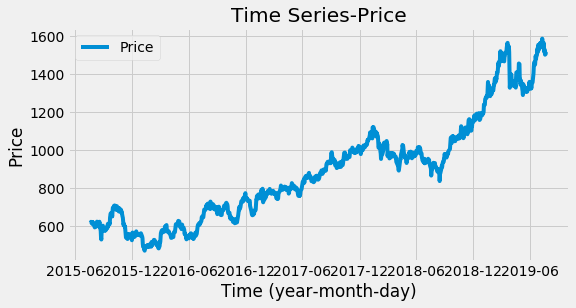

In [9]:

ts = data_selected['Price']
plt.figure(figsize = (8,4))
plt.plot(ts)
plt.title("Time Series-Price")
plt.xlabel("Time (year-month-day)")
plt.ylabel("Price")
plt.legend(loc = 'best')

Over all upward trend with some cyclical behavior 

In [10]:

data_selected['month']=data_selected.index.month
data_selected['dayofweek']=data_selected.index.dayofweek

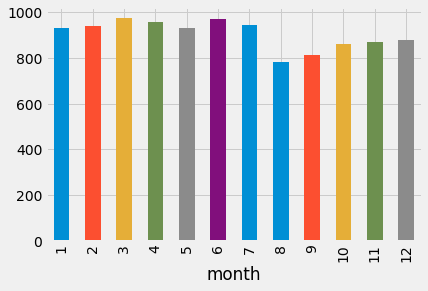

In [11]:
data_selected.groupby('month')['Price'].mean().plot.bar()

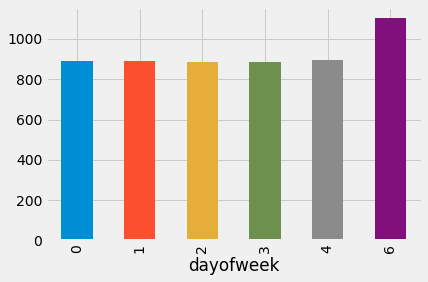

In [12]:
data_selected.groupby('dayofweek')['Price'].mean().plot.bar()

# General behavior of the data

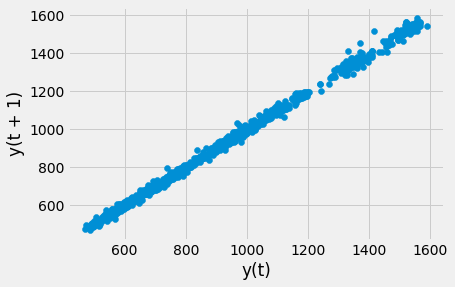

In [37]:
from pandas.plotting import lag_plot
lag_plot(data_selected['Price'])

In [13]:
data_selected.resample(rule="Y").std()

,Price,Open,High,Low,month,dayofweek
Date,,,,,,
2015-12-31,52.307893,52.172650,53.503046,50.586091,1.546942,1.453399
2016-12-31,78.212883,78.135836,77.268865,78.551080,3.401818,1.596309
2017-12-31,92.291236,91.810307,92.100839,91.397873,3.493340,1.675728
2018-12-31,83.738628,83.105999,83.482799,83.371248,3.528395,1.725051
2019-12-31,95.332504,96.122906,95.764350,95.215137,1.962506,1.976047


###### High auto-corrolation. The palladium data is not stationary  

##### Next, Let's check if the time series data is stationary using adfuller test

In [14]:
from statsmodels.tsa.stattools import adfuller

adfuller(data_selected['Price'])

(-1.9628055587272892,
 0.30311580534721894,
 0,
 1117,
 {'1%': -3.4362178526562324,
  '10%': -2.5681495118815665,
  '5%': -2.86413097815723},
 8995.729651656033)

###### p-value=0.30 > 0.05 ----> weak evidence against the null hypothesis. Fail to reject the null hypothesis---->Data has a unit root and is non-stationary

Autocorrelation analysis 

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

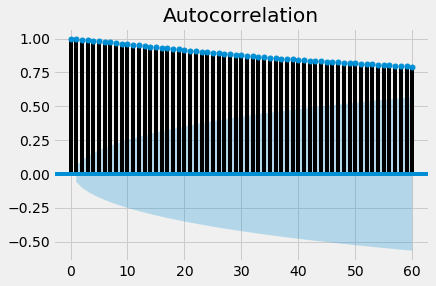

In [18]:
plot_acf(data_selected.Price, lags=60);

No clear seasonality in the data 

ETS decomposition: error trend and seasonality

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
results=seasonal_decompose(data_selected['Price'], model='multiplicative', freq=30)

In [41]:
results

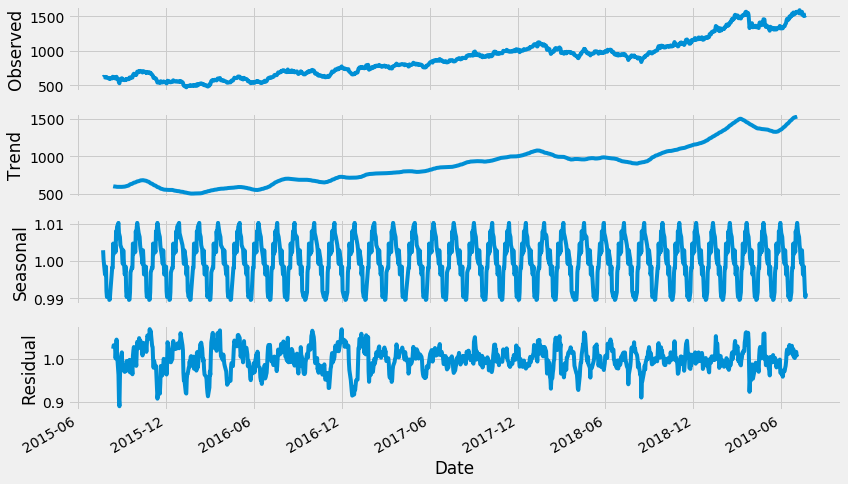

In [48]:
from pylab import rcParams
rcParams['figure.figsize']=12,7
results.plot();

###### EWMA: Exponentially Weighted Moving Average
EWMA will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). 
The formula for EWMA is:
### $y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$

Where $x_t$ is the input value, $w_i$ is the applied weight (Note how it can change from $i=0$ to $t$), and $y_t$ is the output.


When <tt>adjust=True</tt> (default) is used, weighted averages are calculated using weights equal to $w_i = (1 - \alpha)^i$





In [23]:
data_selected.freq="D"
data_selected['EWMA_7']=data_selected['Price'].ewm(span=7).mean()

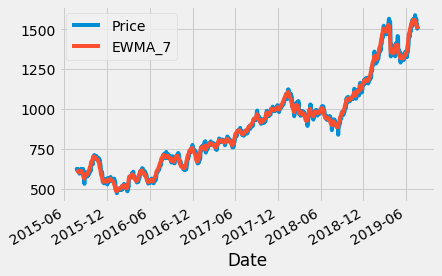

In [24]:
data_selected[['Price', 'EWMA_7']].plot()

In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [27]:
data_selected['DES_7']=ExponentialSmoothing(data_selected['Price'], trend='mul').fit().fittedvalues.shift(-1)

C:\Users\mahjo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


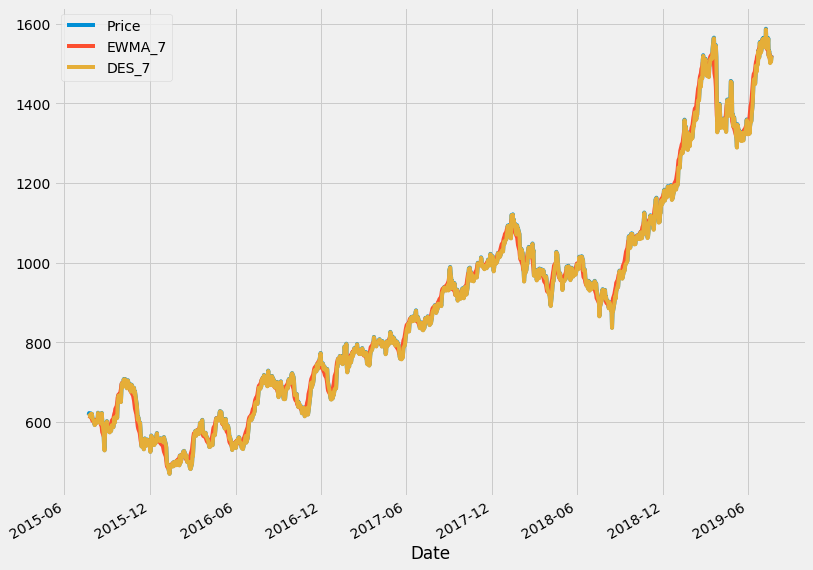

In [44]:
data_selected[['Price', 'EWMA_7', 'DES_7']].plot(figsize=(12,10))

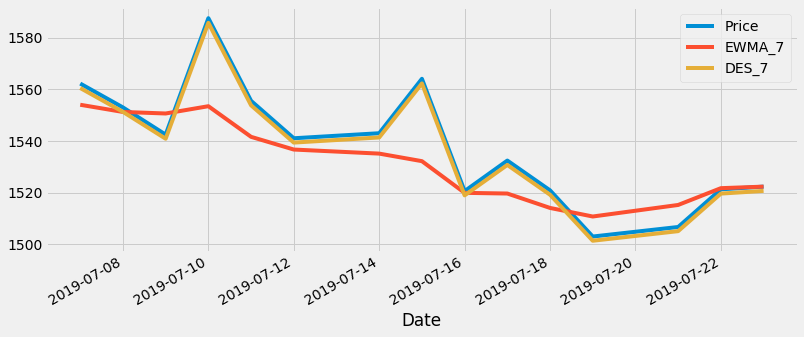

In [30]:
data_selected[['Price', 'EWMA_7', 'DES_7']].iloc[:15].plot(figsize=(12,5))

In [31]:
data_selected['TES_add_7']=ExponentialSmoothing(data_selected['Price'], trend='add', seasonal="add", seasonal_periods=10).fit().fittedvalues

C:\Users\mahjo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


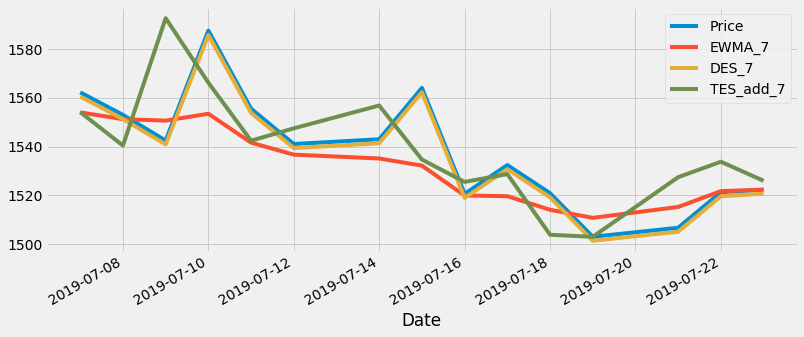

In [32]:
data_selected[['Price', 'EWMA_7', 'DES_7', 'TES_add_7']].iloc[:15].plot(figsize=(12,5))

In [111]:
import statsmodels.api as sm

In [112]:
from statsmodels.tsa.stattools import acovf, acf, pacf_yw, pacf_ols

# Modleing the data

##### Autoregression

In [33]:
from statsmodels.tsa.ar_model import AR, ARResults


In [34]:
data_selected_weekly=data_selected.resample(rule="W").mean()
data_selected_weekly.freq="W"

In [35]:
len(data_selected_weekly)

210

In [36]:
train=data_selected_weekly[:180]
test=data_selected_weekly[180:]
test.head()

,Price,Open,High,Low,month,dayofweek,EWMA_7,DES_7,TES_add_7
Date,,,,,,,,,
2019-01-06,1211.925000,1203.158333,1216.633333,1199.841667,2.833333,2.666667,1239.230824,1210.620058,1219.396051
2019-01-13,1268.725000,1262.383333,1275.683333,1257.175000,1.000000,2.666667,1288.340818,1267.360294,1275.510436
2019-01-20,1321.891667,1310.950000,1340.800000,1301.891667,1.000000,2.666667,1322.211752,1320.461921,1326.518222
2019-01-27,1311.000000,1314.141667,1327.225000,1292.008333,1.000000,2.666667,1313.458772,1309.565217,1306.878449
2019-02-03,1310.675000,1311.700000,1328.958333,1297.558333,1.333333,2.666667,1330.757618,1309.260761,1316.765886


In [153]:
model=AR(train['Price'])

In [154]:
ARfit=model.fit(ic="t-stat")

In [155]:
ARfit.params

const       3.653609
L1.Price    1.355166
L2.Price   -0.573529
L3.Price    0.217381
dtype: float64

In [226]:
AR1fit=model.fit(maxlag=80)

In [227]:
start=len(train)
end=len(train)+len(test)-1
start, end

(180, 209)

In [228]:
prediction1=AR1fit.predict(start=start, end=end)
prediction1=prediction1.rename('AR(1) predictions')
prediction1.index=test.index

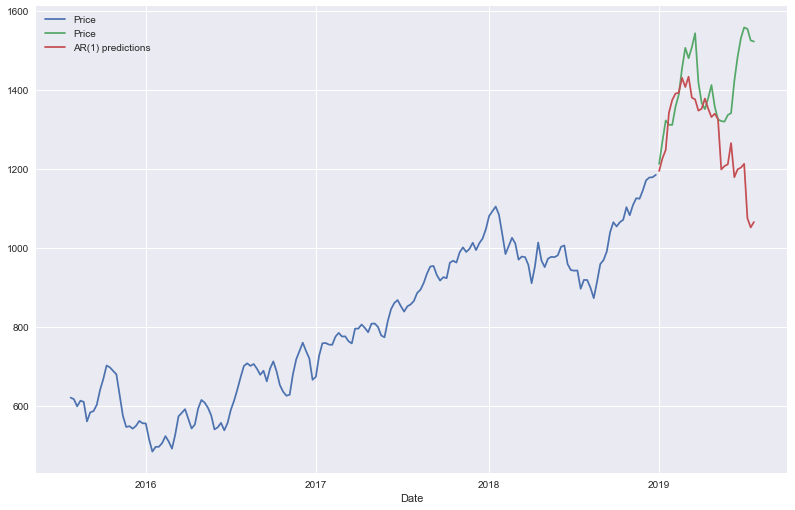

In [229]:
train.Price.plot(figsize=(12,8), legend=True)
test.Price.plot(figsize=(12,8), legend=True)
prediction1.plot(figsize=(12,8), legend=True)

In [194]:
Exp_smoothing=ExponentialSmoothing(train['Price'], trend='add', seasonal="add", seasonal_periods=10).fit()
test_pred=Exp_smoothing.forecast(30)

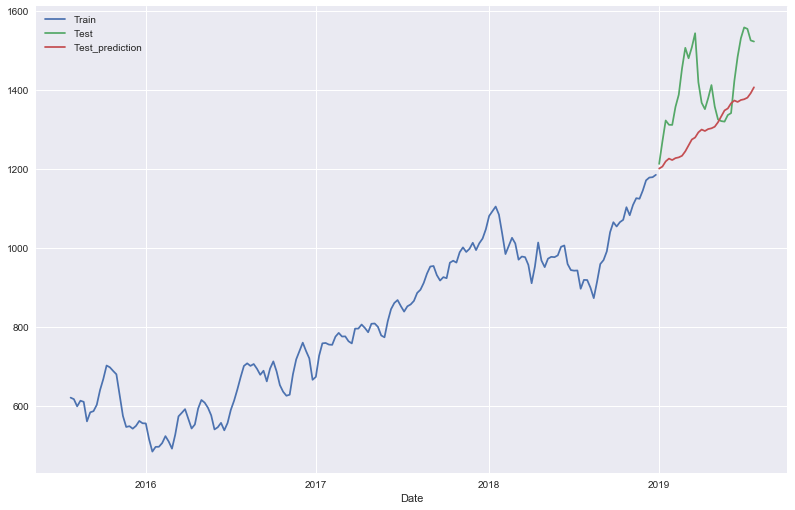

In [196]:
train['Price'].plot(legend=True, label='Train', figsize=(12, 8))
test['Price'].plot(legend=True, label='Test', figsize=(12, 8))
test_pred.plot(legend=True, label='Test_prediction', figsize=(12, 8))

##### ARMA in porgress 

###### Deep learning Keras modleing in progress